In [6]:
# colab 전용 라이브러리
from google.colab import files, drive, output

# pytroch download
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

output.clear()

In [9]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import scipy as sp
from torch.autograd import Variable

In [8]:
torch.__version__

'1.9.0+cu102'

In [10]:
# torch tensor
x = torch.rand(10)
print(x.size)
print(x)

<built-in method size of Tensor object at 0x7f91dc6cc500>
tensor([0.9827, 0.9823, 0.0895, 0.0238, 0.8364, 0.9526, 0.3737, 0.7965, 0.6430,
        0.8166])


In [12]:
temp = torch.FloatTensor([23,24,25,26,27,28])
print(temp.size())
print(temp)

torch.Size([6])
tensor([23., 24., 25., 26., 27., 28.])


In [32]:
# 2차원 텐서
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
boston_tensor = torch.from_numpy(boston.data) # numpy array to torch tensor
boston_tensor.size() 

(506, 13)


torch.Size([506, 13])

In [ ]:
from PIL import Image
panda = np.array(Image.open('panda.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)

print(panda_tensor.size())
plt.imshow(panda_tensor)

In [34]:
# variable
x = torch.autograd.Variable(torch.ones(2,2), requires_grad = True)
y = x.mean()

# y에서 역전파를 거칠 경우, 이전 노드인 x의 기울기 grad를 알 수 있다. 
y.backward()
x.grad

# grad_fn은 자신을 생성한 함수를 참조한다. 그러니까 x의 이전 노드
x.grad_fn
x.data

# x의 mean()으로 생성된 y이므로 grad_fn은 mean()이 된다. 
y.grad_fn

In [37]:
# gpu 활용
from torch import cuda
a = torch.rand(1000,1000)
b = torch.rand(1000, 1000)

%time a.matmul(b)

CPU times: user 29.6 ms, sys: 0 ns, total: 29.6 ms
Wall time: 15.3 ms


tensor([[262.2399, 244.3130, 252.7061,  ..., 253.1793, 248.2833, 247.0993],
        [257.6068, 243.9575, 251.7353,  ..., 250.5244, 243.4355, 242.8529],
        [265.2140, 248.1632, 258.1881,  ..., 252.2497, 249.1680, 247.2599],
        ...,
        [248.4302, 243.0943, 240.6122,  ..., 249.5770, 239.5939, 236.2017],
        [264.0012, 246.9381, 261.4074,  ..., 253.5873, 250.0778, 245.5041],
        [263.5759, 244.7185, 256.4839,  ..., 249.5555, 248.4290, 241.6073]])

In [38]:
a = torch.rand(1000,1000).cuda()
b = torch.rand(1000,1000).cuda()

%time a.matmul(b)

CPU times: user 0 ns, sys: 1.03 ms, total: 1.03 ms
Wall time: 5.11 ms


tensor([[253.0258, 265.8215, 262.6133,  ..., 256.2047, 263.5076, 260.4319],
        [247.0792, 253.9751, 258.8476,  ..., 249.3658, 256.8689, 250.4637],
        [253.2455, 252.1265, 260.4099,  ..., 251.1727, 258.2938, 256.7960],
        ...,
        [242.3036, 254.2359, 248.8151,  ..., 241.3820, 257.1560, 251.0286],
        [251.2181, 253.5649, 253.8959,  ..., 243.1821, 252.6099, 250.8307],
        [252.6522, 258.9348, 256.1276,  ..., 249.1030, 250.9462, 252.3662]],
       device='cuda:0')

In [30]:
# 첫번째 신경망 만들기
def get_data():
    train_x = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

    dtype = torch.FloatTensor
    X = torch.autograd.Variable(torch.from_numpy(train_x).type(dtype), requires_grad = False).view(17,1)
    Y = torch.autograd.Variable(torch.from_numpy(train_y).type(dtype), requires_grad = False)

    return X, Y

def plot_variable(x,y,z = '', **kwargs):
    I = []
    for a in [x,y]:
        I.append(a.data.numpy())
    plt.plot(I[0], I[1], z, **kwargs)

def get_weights():
    w = torch.autograd.Variable(torch.randn(1), requires_grad = True)
    b = torch.autograd.Variable(torch.randn(1), requires_grad = True)

    return w, b

def simple_network(x,w,b):
    y = torch.matmul(x,w) + b
    return y

def loss_fn(y, y_pred):
    loss = (y_pred - y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None:
            param.grad.data.zero_() # grad value = 0로 초기화

    loss.backward() # back-propagation 

    return loss.data

def optimize(lr):
    w.data -= lr * w.grad.data
    b.data -= lr * b.grad.data

lr = 1e-4

x,y = get_data()
w,b = get_weights()

print(x.size())
print(w.size())
print(b.size())

for i in range(500):
    y_pred = simple_network(x,w,b)
    loss = loss_fn(y,y_pred)

    if i % 50 == 0:
        print(loss)
    optimize(lr)

torch.Size([17, 1])
torch.Size([1])
torch.Size([1])
tensor(15.3052)
tensor(3.9931)
tensor(3.9374)
tensor(3.8839)
tensor(3.8326)
tensor(3.7834)
tensor(3.7362)
tensor(3.6909)
tensor(3.6474)
tensor(3.6057)


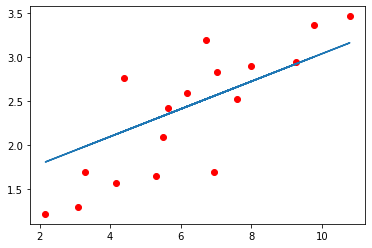

In [31]:
x_np = x.data.numpy()
plot_variable(x,y,'ro')
plot_variable(x,y_pred, label = "fitting curve")

In [ ]:
# dataset class

from torch.utils.data import Dataset

class DogsAndCatsDataset(Dataset):
    def __init__(self, root_dir, size = (224,224)):
        self.files = glob(root_dir)
        self.size = size

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img = np.asarray(Image.open(self.files[idx])).resize(self.size) # resize된 사진
        label = self.files[idx].split('/')[-2]

        return img, label

# dataloader
dataloader = DataLoader(dogsdset, batch_size = 32, num_workers = 2)
for imgs. labels in dataloader:
    # deep learning algorithm
    pass